# Libraries

In [20]:
# numerical analysis
import numpy as np
# storing and processing in dataframes
import pandas as pd
# simple plotting
import matplotlib.pyplot as plt
# advanced plotting
import seaborn as sns

# splitting dataset into train and test
from sklearn.model_selection import train_test_split
# scaling features
from sklearn.preprocessing import StandardScaler
# selecting important features
from sklearn.feature_selection import RFECV
# k nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
# accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Theme

In [3]:
# plot style
sns.set_style('whitegrid')
# color palettes
pal = ['#0e2433', '#ff007f']

# Data

In [5]:
# read data
df = pd.read_csv('./cancer_data.csv')

# first few rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data properties

In [6]:
df.shape

(569, 33)

In [7]:
# columns names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# Exploring the data

B    357
M    212
Name: diagnosis, dtype: int64


/Users/test/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


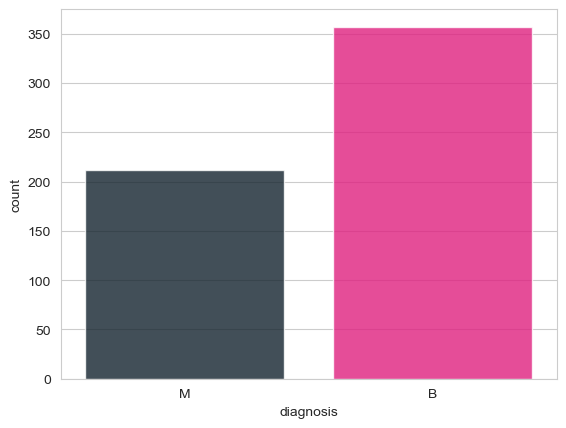

In [8]:
# no of values in each class
print(df['diagnosis'].value_counts())

# plot class distribution
sns.countplot(df['diagnosis'], palette=pal, alpha=0.8)
plt.show()

* There is an inbalance in no. of observations in each class.
* This will possibley lead to a biased model.
* Idealy we want to have approximatly equal no. of observation all the classes.
  
* In this case we can bring down the no. of observation in the 'B' class to no. of obeservation in the 'M'

### Is the mean radius of malignant and benign cancers the same?

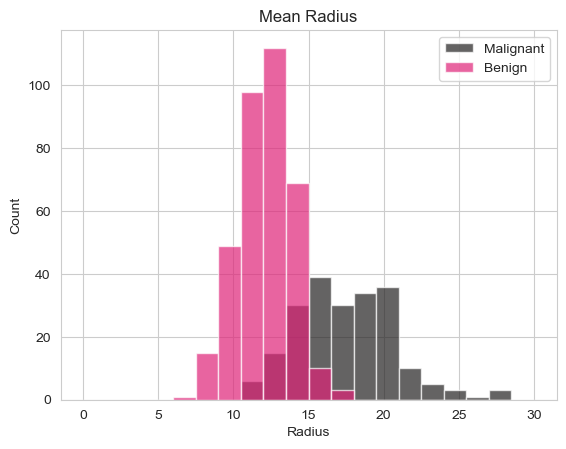

In [10]:
fig, ax = plt.subplots()
m = ax.hist(df[df["diagnosis"] == "M"]['radius_mean'], bins=20, range=(0, 30), 
            label = "Malignant", alpha=0.7, color='#232121')
b = ax.hist(df[df["diagnosis"] == "B"]['radius_mean'], bins=20, range=(0, 30), 
            label = "Benign", alpha=0.7, color='#df2378')
plt.xlabel("Radius")
plt.ylabel("Count")
plt.title("Mean Radius")
plt.legend()
plt.show()

In [11]:
print('Min radius of benign cancer :', df[df['diagnosis']=='B']['radius_mean'].min())
print('Max radius of benign cancer :', df[df['diagnosis']=='B']['radius_mean'].max())
print('Min radius of malignant cancer :', df[df['diagnosis']=='M']['radius_mean'].min())
print('Min radius of malignant cancer :', df[df['diagnosis']=='M']['radius_mean'].max())

Min radius of benign cancer : 6.981
Max radius of benign cancer : 17.85
Min radius of malignant cancer : 10.95
Min radius of malignant cancer : 28.11


# Correlation heatmap

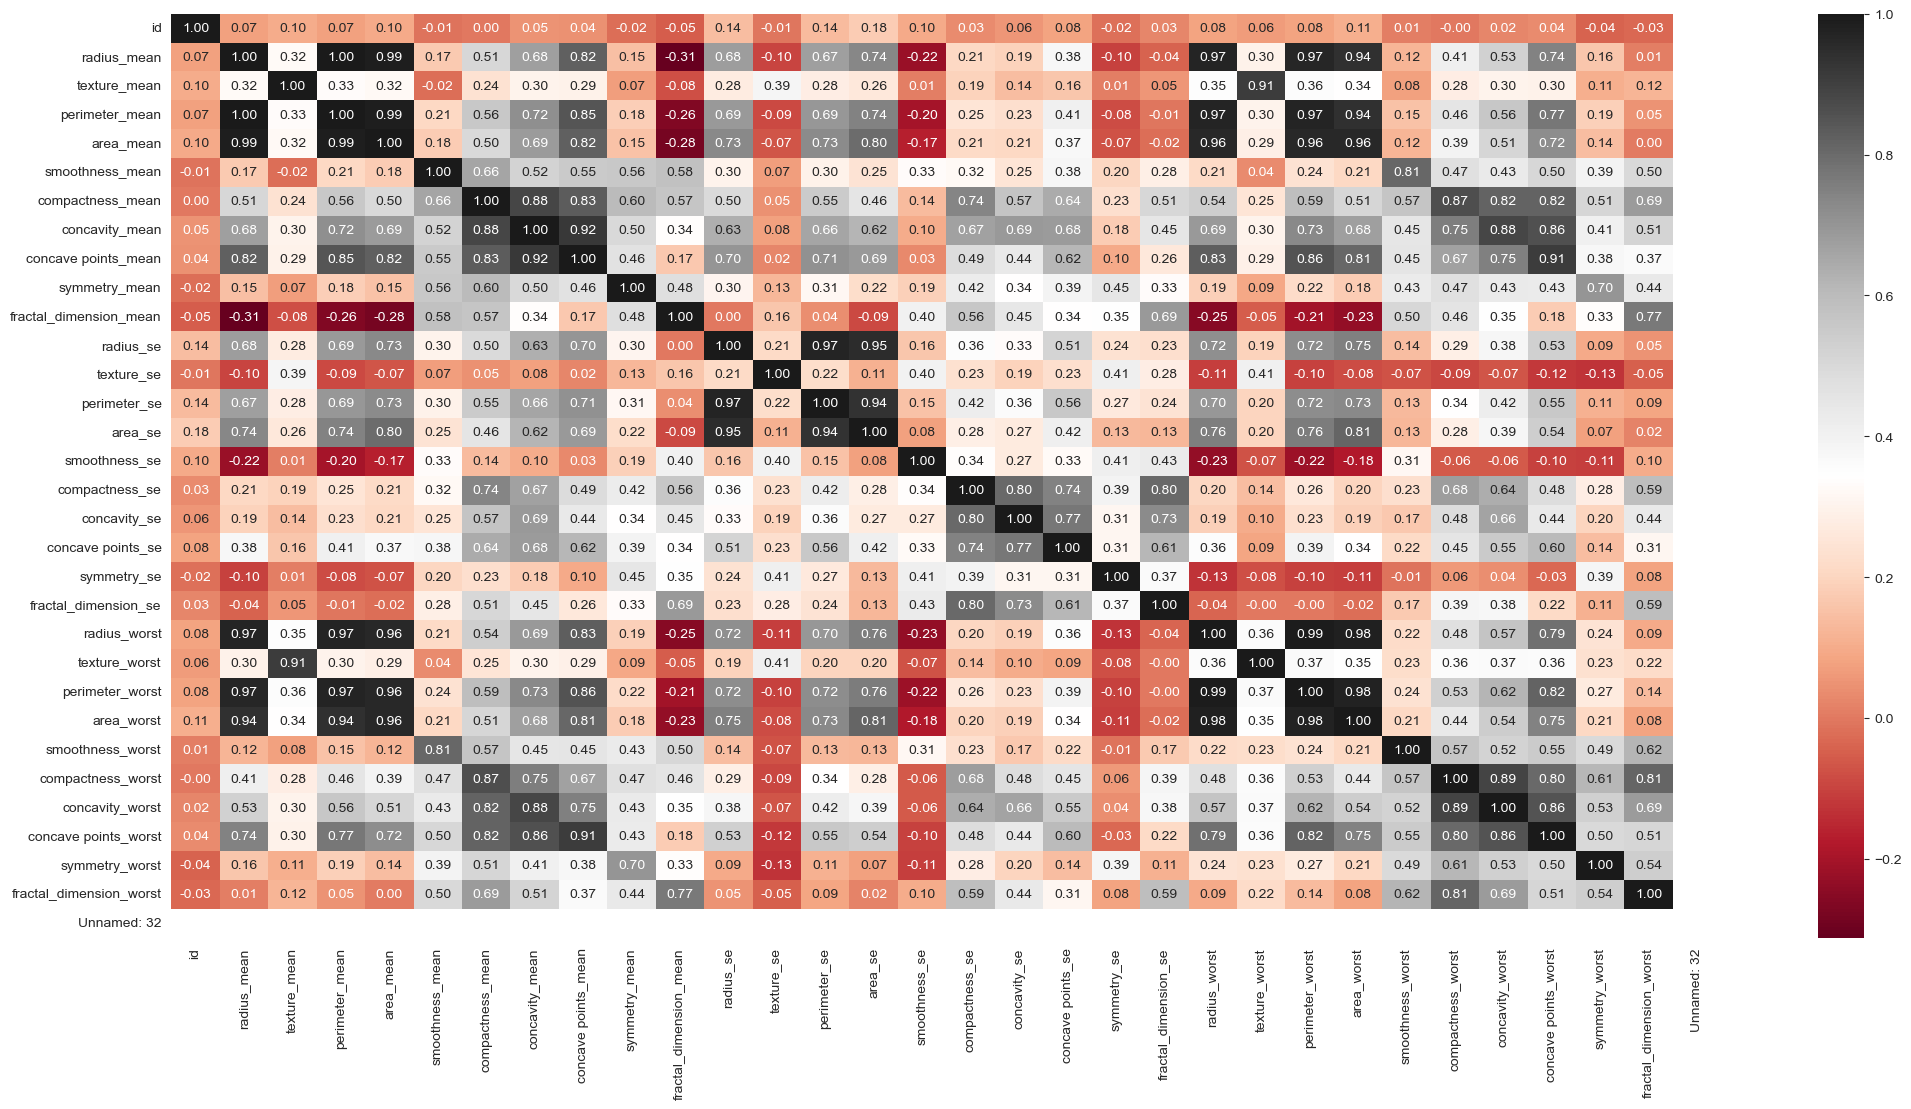

In [12]:
# figure size
plt.figure(figsize=(25, 12))
# plot heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdGy')
# show figure
plt.show()

# Preprocessing

In [13]:
# Drop unwanted columns

df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
print(df.shape)

(569, 31)


In [14]:
# encoding diagnosis data

df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

# ML Modeling

In [15]:
# features and labels
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [16]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
# model initialization
model = KNeighborsClassifier()

# model fitting
model.fit(X_train, y_train)

# predict using the model
pred = model.predict(X_test)

# model validation
print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

0.9521276595744681
[[116   4]
 [  5  63]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       120
           1       0.94      0.93      0.93        68

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



/Users/test/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

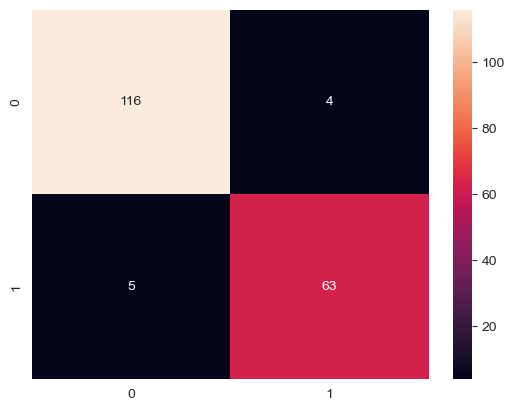

In [23]:
sns.heatmap(confusion_matrix(pred, y_test), annot=True, fmt="d")